In [19]:
import os
import tensorflow
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
from keras.models import load_model
from keras.utils import load_img, img_to_array 
from keras.preprocessing import image

In [4]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)


In [6]:
x_train=train_datagen.flow_from_directory(r"C:\Users\thani_k\Downloads\Fertilizers_Recommendation_System_For_Disease_Prediction\Dataset_Plant_Disease\fruit-dataset\fruit-dataset\train",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [7]:
x_test=test_datagen.flow_from_directory(r"C:\Users\thani_k\Downloads\Fertilizers_Recommendation_System_For_Disease_Prediction\Dataset_Plant_Disease\fruit-dataset\fruit-dataset\test",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [8]:
model=Sequential()

In [9]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))


In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [11]:
32*(3*3*3+1)
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [12]:
model.add(Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

225

In [13]:
1238/24

51.583333333333336

In [14]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
225/225 [==============================] - 80s 350ms/step - loss: 0.6349 - accuracy: 0.8189 - val_loss: 0.2122 - val_accuracy: 0.9259
Epoch 2/10
225/225 [==============================] - 67s 297ms/step - loss: 0.2355 - accuracy: 0.9207 - val_loss: 0.1760 - val_accuracy: 0.9389
Epoch 3/10
225/225 [==============================] - 66s 294ms/step - loss: 0.1924 - accuracy: 0.9352 - val_loss: 0.1518 - val_accuracy: 0.9531
Epoch 4/10
225/225 [==============================] - 65s 289ms/step - loss: 0.1549 - accuracy: 0.9482 - val_loss: 0.1683 - val_accuracy: 0.9448
Epoch 5/10
225/225 [==============================] - 67s 298ms/step - loss: 0.1415 - accuracy: 0.9493 - val_loss: 0.1472 - val_accuracy: 0.9543
Epoch 6/10
225/225 [==============================] - 70s 311ms/step - loss: 0.1190 - accuracy: 0.9580 - val_loss: 0.1223 - val_accuracy: 0.9632
Epoch 7/10
225/225 [==============================] - 71s 314ms/step - loss: 0.1052 - accuracy: 0.9629 - val_loss: 0.1258 - val_ac

In [15]:
model.save('fruitdata.h5')


In [16]:
model=load_model('fruitdata.h5')

In [57]:
img=tensorflow.keras.utils.load_img(r"C:\Users\thani_k\Downloads\Fertilizers_Recommendation_System_For_Disease_Prediction\Dataset_Plant_Disease\fruit-dataset\fruit-dataset\test\Corn_(maize)___Northern_Leaf_Blight\00a55069-3fa3-405b-8d87-4d3408a6ed98___RS_NLB 3645.JPG",target_size=(128,128))


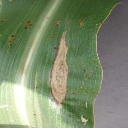

In [58]:
img

In [59]:
x=tensorflow.keras.utils.img_to_array(img)

In [60]:
x

array([[[126., 139.,  95.],
        [126., 142., 103.],
        [ 95., 115.,  80.],
        ...,
        [ 77.,  72.,  78.],
        [ 78.,  73.,  79.],
        [ 78.,  73.,  80.]],

       [[145., 158., 114.],
        [128., 144., 105.],
        [ 94., 116.,  80.],
        ...,
        [ 79.,  74.,  80.],
        [ 79.,  74.,  80.],
        [ 79.,  74.,  81.]],

       [[160., 176., 131.],
        [132., 150., 110.],
        [ 98., 120.,  84.],
        ...,
        [ 82.,  77.,  83.],
        [ 81.,  76.,  82.],
        [ 80.,  75.,  82.]],

       ...,

       [[130., 143.,  99.],
        [130., 143.,  99.],
        [136., 149., 106.],
        ...,
        [149., 144., 150.],
        [147., 142., 148.],
        [146., 141., 147.]],

       [[112., 125.,  82.],
        [108., 121.,  78.],
        [123., 135.,  95.],
        ...,
        [147., 142., 148.],
        [146., 141., 147.],
        [145., 140., 146.]],

       [[130., 143., 100.],
        [125., 137.,  97.],
        [130., 1

In [61]:
x=np.expand_dims(x,axis=0)


In [62]:
x

array([[[[126., 139.,  95.],
         [126., 142., 103.],
         [ 95., 115.,  80.],
         ...,
         [ 77.,  72.,  78.],
         [ 78.,  73.,  79.],
         [ 78.,  73.,  80.]],

        [[145., 158., 114.],
         [128., 144., 105.],
         [ 94., 116.,  80.],
         ...,
         [ 79.,  74.,  80.],
         [ 79.,  74.,  80.],
         [ 79.,  74.,  81.]],

        [[160., 176., 131.],
         [132., 150., 110.],
         [ 98., 120.,  84.],
         ...,
         [ 82.,  77.,  83.],
         [ 81.,  76.,  82.],
         [ 80.,  75.,  82.]],

        ...,

        [[130., 143.,  99.],
         [130., 143.,  99.],
         [136., 149., 106.],
         ...,
         [149., 144., 150.],
         [147., 142., 148.],
         [146., 141., 147.]],

        [[112., 125.,  82.],
         [108., 121.,  78.],
         [123., 135.,  95.],
         ...,
         [147., 142., 148.],
         [146., 141., 147.],
         [145., 140., 146.]],

        [[130., 143., 100.],
       

In [63]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 112ms/step


In [64]:
y

array([3], dtype=int64)

In [65]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [66]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight','Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [67]:
index[y[0]]

'Corn_(maize)___healthy'